# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Loading Dataset

In [2]:
data = pd.read_csv(
    r"C:\Users\gasse\OneDrive\Desktop\17 Text Classification\Corona.csv",
    header=0,
    encoding='cp437'
)

data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


# Data Overview

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [4]:
data.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


# Sentiment Distribution

In [5]:
data['Sentiment'].value_counts()

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

In [6]:
data['Sentiment'].nunique()

5

# Create Binary & Multi-Class Labels

In [7]:
def binary_class(sentiment):
    return 1 if sentiment in ['Positive', 'Extremely Positive'] else 0

data['BCategory'] = data['Sentiment'].apply(binary_class)

In [8]:
labels = {
    'Extremely Positive': 0,
    'Positive': 1,
    'Neutral': 2,
    'Negative': 3,
    'Extremely Negative': 4
}

data['MCategory'] = data['Sentiment'].map(labels)

In [9]:
data[['Sentiment','BCategory','MCategory']].head()

,Sentiment,BCategory,MCategory
0,Neutral,0,2
1,Positive,1,1
2,Positive,1,1
3,Positive,1,1
4,Extremely Negative,0,4


# Text Feature Engineering

In [10]:
data['TLength'] = data['OriginalTweet'].apply(len)
data['SentenceLength'] = data['OriginalTweet'].apply(lambda x: len(x.split()))
data['Numbers'] = data['OriginalTweet'].apply(lambda x: sum(c.isdigit() for c in x))
data['Special'] = data['OriginalTweet'].apply(lambda x: sum(c in '!@#$%^&*()' for c in x))
data['Links'] = data['OriginalTweet'].apply(lambda x: x.count('https'))

In [11]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,BCategory,MCategory,TLength,SentenceLength,Numbers,Special,Links
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,2,111,8,5,3,3
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,1,1,237,38,0,0,0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,1,1,131,14,4,0,1
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,1,1,306,42,10,7,1
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0,4,310,40,4,6,1


# Feature-Based Model (Binary Classification)

In [12]:
X = data[['TLength','SentenceLength','Numbers','Special','Links']]
y = data['BCategory']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [13]:
rf_binary = RandomForestClassifier(
    n_estimators=500,
    max_depth=7,
    criterion='gini',
    random_state=33
)

rf_binary.fit(X_train, y_train)
y_pred = rf_binary.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.92      0.71      4615
           1       0.55      0.13      0.21      3617

    accuracy                           0.57      8232
   macro avg       0.56      0.52      0.46      8232
weighted avg       0.56      0.57      0.49      8232



# Confusion Matrix

In [ ]:
X = data[['TLength','SentenceLength','Numbers','Special','Links']]
y = data['BCategory']

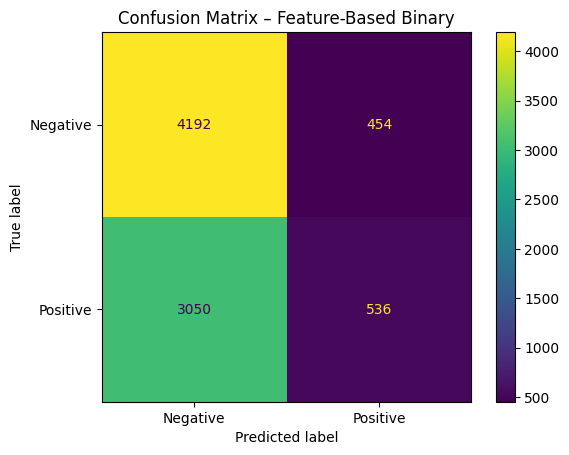

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_feat_binary = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_feat_binary,
    display_labels=['Negative', 'Positive']
)

disp.plot()
plt.title("Confusion Matrix – Feature-Based Binary")
plt.show()

# Feature-Based Model (Multi-Class)

In [14]:
X = data[['TLength','SentenceLength','Numbers','Special','Links']]
y = data['MCategory']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [15]:
rf_multi = RandomForestClassifier(
    n_estimators=500,
    max_depth=7,
    criterion='gini',
    random_state=33
)

rf_multi.fit(X_train, y_train)
y_pred = rf_multi.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.05      0.08      1330
           1       0.29      0.76      0.42      2287
           2       0.41      0.47      0.44      1553
           3       0.30      0.04      0.07      2006
           4       0.00      0.00      0.00      1056

    accuracy                           0.32      8232
   macro avg       0.27      0.26      0.20      8232
weighted avg       0.29      0.32      0.23      8232



C:\Users\gasse\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\gasse\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\gasse\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

# Confusion Matrix

In [32]:
X = data[['TLength','SentenceLength','Numbers','Special','Links']]
y = data['MCategory']

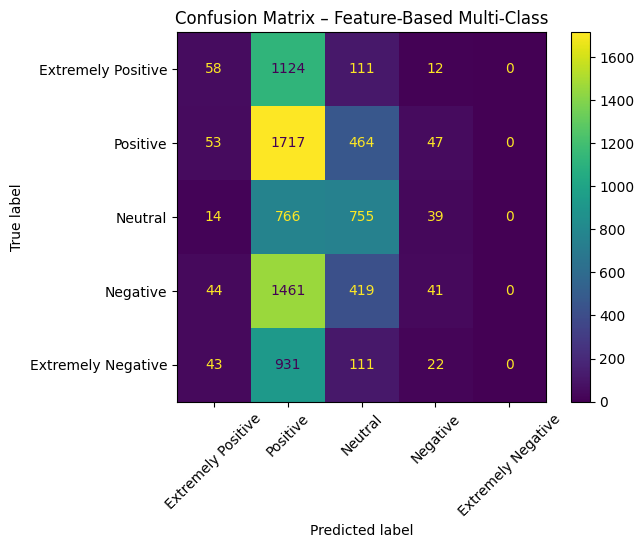

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = [
    'Extremely Positive',
    'Positive',
    'Neutral',
    'Negative',
    'Extremely Negative'
]

cm_feat_multi = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_feat_multi,
    display_labels=labels
)

disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix – Feature-Based Multi-Class")
plt.show()

# TF-IDF Vectorization

In [16]:
tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    stop_words='english',
    min_df=5
)

X_tfidf = tfidf.fit_transform(data['OriginalTweet'])

In [17]:
X_tfidf.shape

(41157, 10000)

# TF-IDF + RandomForest (Binary)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, data['BCategory'],
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [19]:
rf_tfidf_binary = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    criterion='entropy',
    random_state=33,
    n_jobs=-1
)

rf_tfidf_binary.fit(X_train, y_train)
y_pred = rf_tfidf_binary.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.99      0.75      4615
           1       0.93      0.18      0.30      3617

    accuracy                           0.63      8232
   macro avg       0.77      0.58      0.53      8232
weighted avg       0.75      0.63      0.55      8232



# Confusion Matrix

In [36]:
X = data['OriginalTweet']
y = data['BCategory']

tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)

X_vec = tfidf.fit_transform(X)

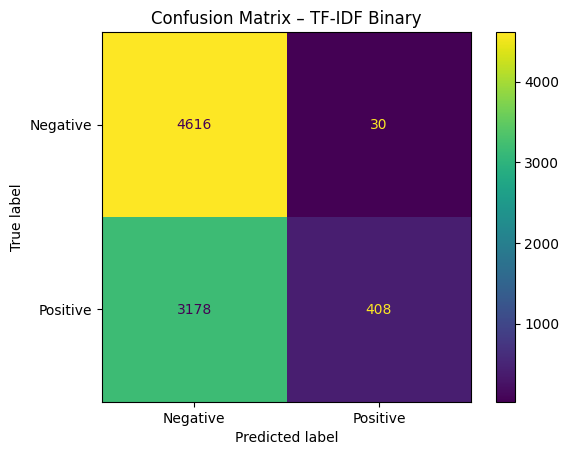

In [39]:
cm_tfidf_binary = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_tfidf_binary,
    display_labels=['Negative', 'Positive']
)

disp.plot()
plt.title("Confusion Matrix – TF-IDF Binary")
plt.show()

# TF-IDF + RandomForest (Multi-Class)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, data['MCategory'],
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [21]:
rf_tfidf_multi = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    criterion='entropy',
    random_state=33,
    n_jobs=-1
)

rf_tfidf_multi.fit(X_train, y_train)
y_pred = rf_tfidf_multi.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01      1330
           1       0.30      0.97      0.45      2287
           2       0.84      0.04      0.07      1553
           3       0.39      0.12      0.18      2006
           4       0.73      0.02      0.04      1056

    accuracy                           0.31      8232
   macro avg       0.65      0.23      0.15      8232
weighted avg       0.59      0.31      0.19      8232



# Confusion Matrix

In [41]:
X = data['OriginalTweet']
y = data['MCategory']

tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)

X_vec = tfidf.fit_transform(X)

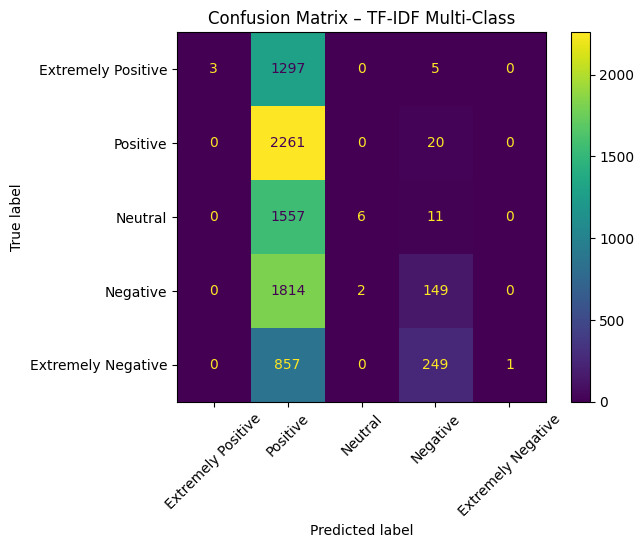

In [44]:
cm_tfidf_multi = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_tfidf_multi,
    display_labels=labels
)

disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix – TF-IDF Multi-Class")
plt.show()
